## Optimizing DataFrame Memory Usage

In this project, we’ll practice working with chunked DataFrames and learn how to optimize memory usage in pandas. The dataset comes from Lending Club, a peer-to-peer lending platform that connects borrowers and investors.

### Dataset

We’ll use loan data from 2007 to 2011.
The `desc` column has been removed to speed up processing.
The full dataset is about 67 MB, but we’ll assume a 10 MB memory limit and load it in chunks no larger than 5 MB for safety.

> Reference: A complete version of this dataset is available on [Kaggle](https://www.kaggle.com/)

In [1]:
import pandas as pd
pd.options.display.max_columns = 99
import matplotlib.pyplot as plt

In [2]:
loan = pd.read_csv('loans_2007.csv', low_memory = False)

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


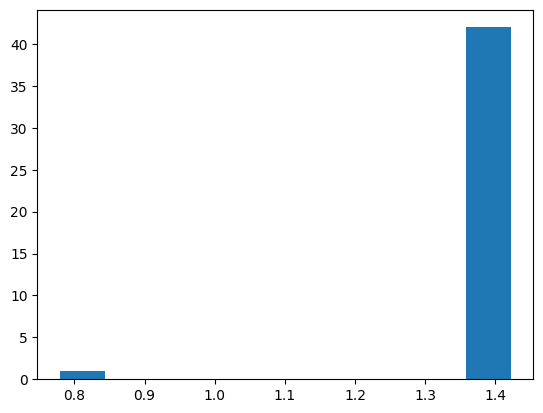

In [4]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=1000)

memory_footprints = []

for chunk in chunk_iter:
    mem = chunk.memory_usage(deep=True).sum() / (1024 ** 2)
    memory_footprints.append(mem)

plt.hist(memory_footprints)
plt.show()

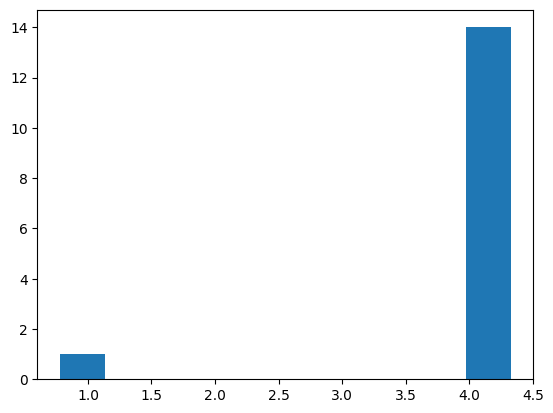

In [5]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)

memory_footprints = []

for chunk in chunk_iter:
    mem = chunk.memory_usage(deep=True).sum() / (1024 ** 2)
    memory_footprints.append(mem)

plt.hist(memory_footprints)
plt.show()

In [6]:
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)

for i, chunk in enumerate(chunk_iter, start=1):
    num_cols = chunk.select_dtypes(include=['number']).shape[1]
    str_cols = chunk.select_dtypes(include=['object', 'string']).shape[1]
    print(f"Chunk {i}: Numeric columns: {num_cols}, String columns: {str_cols}")

Chunk 1: Numeric columns: 31, String columns: 21
Chunk 2: Numeric columns: 31, String columns: 21
Chunk 3: Numeric columns: 31, String columns: 21
Chunk 4: Numeric columns: 31, String columns: 21
Chunk 5: Numeric columns: 31, String columns: 21
Chunk 6: Numeric columns: 31, String columns: 21
Chunk 7: Numeric columns: 31, String columns: 21
Chunk 8: Numeric columns: 31, String columns: 21
Chunk 9: Numeric columns: 31, String columns: 21
Chunk 10: Numeric columns: 31, String columns: 21
Chunk 11: Numeric columns: 31, String columns: 21
Chunk 12: Numeric columns: 31, String columns: 21
Chunk 13: Numeric columns: 31, String columns: 21
Chunk 14: Numeric columns: 30, String columns: 22
Chunk 15: Numeric columns: 30, String columns: 22


In [7]:
chunk_iter = pd.read_csv("loans_2007.csv", chunksize=3000)

for i, chunk in enumerate(chunk_iter, start=1):
    print(f"Chunk {i}")
    unique_counts = chunk.nunique()
    print(unique_counts)
    print("-" * 40)

Chunk 1
id                            3000
member_id                     3000
loan_amnt                      390
funded_amnt                    438
funded_amnt_inv                663
term                             2
int_rate                        36
installment                   1591
grade                            7
sub_grade                       35
emp_title                     2653
emp_length                      11
home_ownership                   3
annual_inc                     641
verification_status              3
issue_d                          2
loan_status                      6
pymnt_plan                       1
purpose                         13
title                         1406
zip_code                       568
addr_state                      43
dti                           1717
delinq_2yrs                      5
earliest_cr_line               366
inq_last_6mths                   9
open_acc                        29
pub_rec                          2
revol_bal   

In [8]:
chunk_iter = pd.read_csv("loans_2007.csv", chunksize=3000)

for i, chunk in enumerate(chunk_iter, start=1):
    print(f"Chunk {i}")

    str_cols = chunk.select_dtypes(include=['object', 'string'])
    unique_ratio = str_cols.nunique() / len(chunk)
    low_unique = unique_ratio[unique_ratio < 0.5]

    print(f"Columns with <50% unique values: {len(low_unique)}")
    print(low_unique)
    print("-" * 40)

Chunk 1
Columns with <50% unique values: 20
term                   0.000667
int_rate               0.012000
grade                  0.002333
sub_grade              0.011667
emp_length             0.003667
home_ownership         0.001000
verification_status    0.001000
issue_d                0.000667
loan_status            0.002000
pymnt_plan             0.000333
purpose                0.004333
title                  0.468667
zip_code               0.189333
addr_state             0.014333
earliest_cr_line       0.122000
revol_util             0.294667
initial_list_status    0.000333
last_pymnt_d           0.018000
last_credit_pull_d     0.018333
application_type       0.000333
dtype: float64
----------------------------------------
Chunk 2
Columns with <50% unique values: 20
term                   0.000667
int_rate               0.012000
grade                  0.002333
sub_grade              0.011667
emp_length             0.003667
home_ownership         0.001000
verification_status    0

In [9]:
chunk_iter = pd.read_csv("loans_2007.csv", chunksize=3000)

for i, chunk in enumerate(chunk_iter, start=1):
    float_cols = chunk.select_dtypes(include=['float'])
    float_cols_na = float_cols.isnull().sum()

    no_missing = float_cols_na[float_cols_na == 0].index.tolist()

    print(f"Chunk {i}: Float columns with no missing values ({len(no_missing)} total)")
    print(no_missing)
    print("-" * 40)

Chunk 1: Float columns with no missing values (30 total)
['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']
----------------------------------------
Chunk 2: Float columns with no missing values (30 total)
['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',

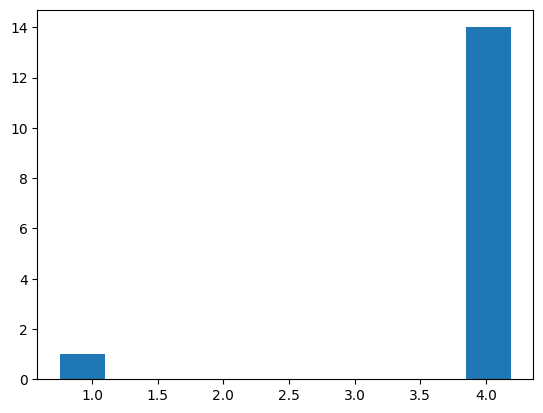

In [10]:
chunk_iter = pd.read_csv("loans_2007.csv", chunksize=3000)

memory_footprints = []

for chunk in chunk_iter:
    chunk['int_rate'] = (
        chunk['int_rate']
        .str.rstrip('%')
        .astype(float)
    )
    mem = chunk.memory_usage(deep=True).sum() / (1024 ** 2)
    memory_footprints.append(mem)

plt.hist(memory_footprints)
plt.show()

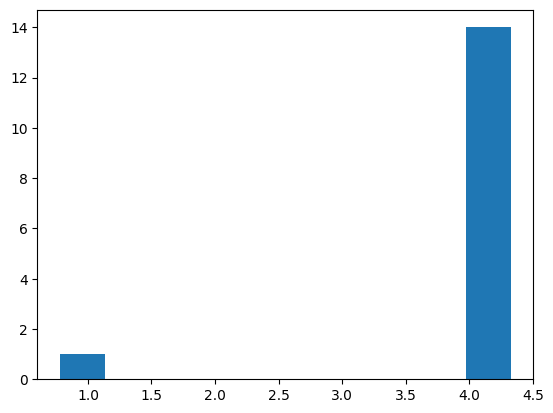

In [11]:
chunk_iter = pd.read_csv("loans_2007.csv", chunksize=3000)

memory_footprints = []

for chunk in chunk_iter:
    mem = chunk.memory_usage(deep=True).sum() / (1024 ** 2)
    memory_footprints.append(mem)

plt.hist(memory_footprints)
plt.show()